In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv("B:\Data-Project-1\Thyroid_Diff.csv")

In [37]:
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


## Data fram info

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [17]:
df = df.rename(columns = {'Hx Smoking':'Smoke_hist',
                     'Hx Radiothreapy':'Radiotherapy_hist',
                     'Thyroid Function':'Status',
                     'Pathology':'Type',
                     'T':'Tumor_class',
                     'N':'Nodal_class',
                     'M':'Metastatis_class'})

- Age: The age of the patient at the time of diagnosis or treatment.
- Gender: The gender of the patient (male or female).
- Smoking: Whether the patient is a smoker or not.
- Hx Smoking: Smoking history of the patient (e.g., whether they have ever smoked).
- Hx Radiotherapy: History of radiotherapy treatment for any condition.
- Thyroid Function: The status of thyroid function, possibly indicating if there are any abnormalities.
- Physical Examination: Findings from a physical examination of the patient, which may include palpation of the thyroid gland and surrounding structures.
- Adenopathy: Presence or absence of enlarged lymph nodes (adenopathy) in the neck region.
- Pathology: Specific types of thyroid cancer as determined by pathology examination of biopsy samples.
- Focality: Whether the cancer is unifocal (limited to one location) or multifocal (present in multiple locations).
- Risk: The risk category of the cancer based on various factors, such as tumor size, extent of spread, and histological type.
- T: Tumor classification based on its size and extent of invasion into nearby structures.
- N: Nodal classification indicating the involvement of lymph nodes.
- M: Metastasis classification indicating the presence or absence of distant metastases.
- Stage: The overall stage of the cancer, typically determined by combining T, N, and M classifications.
- Response: Response to treatment, indicating whether the cancer responded positively, negatively, or remained stable after treatment.
- Recurred: Indicates whether the cancer has recurred after initial treatment

Note there is no missing values so no changes have to be made here. 

In [18]:
unique_val = [df[n].unique() for n in df.columns]
columns = df.columns
for i in range(len(unique_val)):
    print(f'Unique values for {columns[i]}: {unique_val[i]}')

Unique values for Age: [27 34 30 62 52 41 46 51 40 75 59 49 50 76 42 44 43 36 70 60 33 26 37 55
 31 45 20 38 29 25 21 23 24 35 54 22 69 28 17 73 18 39 57 66 32 47 56 63
 19 67 72 61 68 48 81 53 58 80 79 65 15 82 71 64 78]
Unique values for Gender: ['F' 'M']
Unique values for Smoking: ['No' 'Yes']
Unique values for Smoke_hist: ['No' 'Yes']
Unique values for Radiotherapy_hist: ['No' 'Yes']
Unique values for Status: ['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']
Unique values for Physical Examination: ['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']
Unique values for Adenopathy: ['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']
Unique values for Type: ['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']
Unique values for Focality: ['Uni-Focal' 'Multi-Focal']
Unique values for Risk: ['Low' 'Intermediate' 'High']
Unique values for Tumor_c

From this:
- Age: scale it.
- Gender-Focalty: one hot.
- Risk, Tumur, Nodal, Metastatis and Stage - origanal encode. Risk is with low being the weakest class and high being the strongest class. For Tumor class the lower the number the smaller the tumor as  well as this (a) is weaker than (b) for the same number [1]. For Nodal class N0 means cancer has not spread to lymph nodes, N1a means cancer has spread to lymph nodes near thyroid and N1b means cancer has spread to lymph nodes outside the thyroid and this is the strongest class. Metastatis tells you if it has spread to another part of the body, M0 means it hasnt and M1 means it has.
- Rest is one hot


## Data insights

Percentage Recurrance with respect to gender:
                  Percentage
Gender Recurred            
F      No          0.788462
       Yes         0.211538
M      No          0.408451
       Yes         0.591549


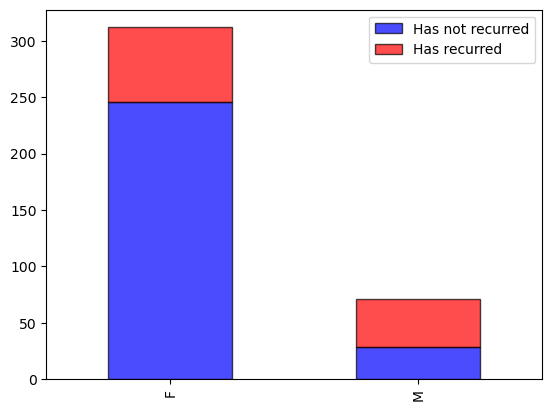

In [19]:
def percentage_gender_recurr_bar():
    recurr_per_gender = df[['Gender', 'Recurred']].value_counts(sort = False)
    gender_recur_plot = pd.DataFrame({
        'Has not recurred':[recurr_per_gender.iloc[0], recurr_per_gender.iloc[2]],
        'Has recurred':[recurr_per_gender.iloc[1], recurr_per_gender.iloc[3]]
    }, 
    index=['F', 'M'])

    gender_recur_plot.plot(kind='bar', stacked=True, color=['blue', 'red'], alpha = 0.7, edgecolor = 'black')
    
    percentages = pd.DataFrame(df[['Gender', 'Recurred']].value_counts(sort = False)/df['Gender'].value_counts(sort = False))
    percentages = percentages.rename(columns={'count':'Percentage'})

    print(f'Percentage Recurrance with respect to gender:\n {percentages}')

percentage_gender_recurr_bar()

Insights from this:
- Many more females were observed than males so statified sampling can be used when splitting for test and train data
- Seeems like its more likely for the cancer to come back if your a male than if your a female by a decent proportion, however there is uncertainty as not many males used for this test. (Percentage males that have had recurred cancer is 59% but for females this is 21%)

                        Doesnt recur  Does recur
Females who dont smoke           243          60
Females who smoke                  3           6
Males who dont smoke              16          15
Males who smoke                   13          27
Percentage of females that smoke: 3%
Percentage of males that smoke: 56%
Percentage of Female patients that smoke which have cancer recurrence: 67%
Percentage of Male patients that smoke which have cancer recurrence: 68%
Percentage of Female patients that dont smoke which have cancer recurrence: 20%
Percentage of Male patients that dont smoke which have cancer recurrence: 48%


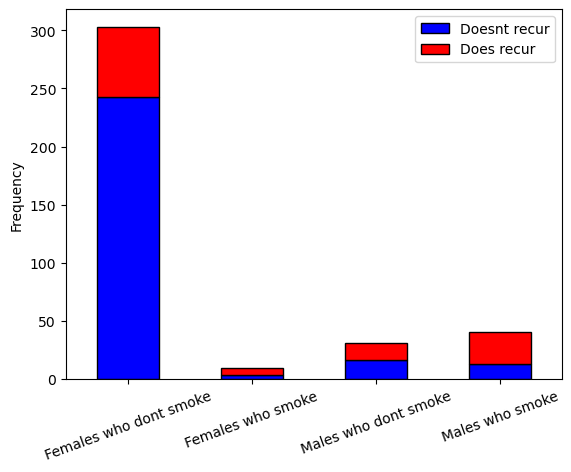

In [20]:
#Mabye check why males have a larger percentage change of cancer recurring. Check smoking, smokeing hist, radio therapy
def smoke_hist(): 
    smoke_rec_df = df[["Gender", "Smoking", "Recurred"]]
    #smoke_rec_df_F = df[["Gender", "Smoking", "Recurred"]][df["Gender"]=='F']
    # Sort = False so its in alphabetical order.( No first then Yes)
    key = []
    val = []
    for gender in df["Gender"].unique():
        for smoke in df["Smoking"].unique():
            val_to_append = smoke_rec_df.loc[(smoke_rec_df['Gender'] == gender) & (smoke_rec_df['Smoking'] == smoke)].value_counts(sort=False)
            key.append(gender +', '+ smoke)
            val.append(np.array(val_to_append[:]))

    dict_for_hist = pd.DataFrame(dict(zip(key, val)), index = ['Doesnt recur', 'Does recur'])
    dict_for_hist = dict_for_hist.rename(columns={'F, No':'Females who dont smoke',
                        'F, Yes':'Females who smoke',
                        'M, No':'Males who dont smoke',
                        'M, Yes':'Males who smoke'})
    #for key, value in dict_for_hist.items():
    #dict_for_hist.plot(kind = 'bar', ylabel = 'Frequency', color = ['blue','red','purple', 'yellow'], edgecolor='black')
    dict_for_hist.T.plot(kind = 'bar', ylabel = 'Frequency', stacked=True, color = ['blue','red'], edgecolor='black', rot=20)
    print(dict_for_hist.T)

def percentage_smoking_print_statments():
    # Percentage of Females and Males that smoke
    percentage_female_smoke = df.loc[(df['Gender']=='F') & (df['Smoking'] == 'Yes')].shape[0]/df.loc[(df['Gender']=='F')].shape[0]
    percentage_male_smoke = df.loc[(df['Gender']=='M') & (df['Smoking'] == 'Yes')].shape[0]/df.loc[(df['Gender']=='M')].shape[0]
    print(f'Percentage of females that smoke: {round(percentage_female_smoke * 100)}%')
    print(f'Percentage of males that smoke: {round(percentage_male_smoke * 100)}%')
    # Percentage of Femalees and Males that smoke which have cancer recurrence
    percentage_female_smoke_recur = df.loc[(df['Gender']=='F') & (df['Smoking'] == 'Yes') & (df['Recurred']=='Yes')].shape[0]/df.loc[(df['Gender']=='F') & (df['Smoking'] == 'Yes')].shape[0]
    percentage_male_smoke_recur = df.loc[(df['Gender']=='M') & (df['Smoking'] == 'Yes') & (df['Recurred']=='Yes')].shape[0]/df.loc[(df['Gender']=='M') & (df['Smoking'] == 'Yes')].shape[0]
    print(f'Percentage of Female patients that smoke which have cancer recurrence: {round(percentage_female_smoke_recur * 100)}%')
    print(f'Percentage of Male patients that smoke which have cancer recurrence: {round(percentage_male_smoke_recur * 100)}%')
    # Percentage of Female and Males that dont smoke which have cancer recurrence
    percentage_female_nosmoke_recur = df.loc[(df['Gender']=='F') & (df['Smoking'] == 'No') & (df['Recurred']=='Yes')].shape[0]/df.loc[(df['Gender']=='F') & (df['Smoking'] == 'No')].shape[0]
    percentage_male_nosmoke_recur = df.loc[(df['Gender']=='M') & (df['Smoking'] == 'No') & (df['Recurred']=='Yes')].shape[0]/df.loc[(df['Gender']=='M') & (df['Smoking'] == 'No')].shape[0]
    print(f'Percentage of Female patients that dont smoke which have cancer recurrence: {round(percentage_female_nosmoke_recur * 100)}%')
    print(f'Percentage of Male patients that dont smoke which have cancer recurrence: {round(percentage_male_nosmoke_recur * 100)}%')

smoke_hist()
percentage_smoking_print_statments()

Insights:
- Larger percentage of males smoke than females. This can explain why the cancer recurrence is more common in males than in females. This difference is large, 3% for females and aroudn 56% for males.
- The ratio of non-smokers to smokers for females and males is much larger in the doesnt recur category. This means that no matter the gender, if you dont smoke its less likely that the cancer with recur.
- Proportion of patients who are females and dont smoke and have cancer recurrence is much lower than the proportion of patients who are males and dont smoke which have cancer recurrence. Problem is there are not as many male cancer patients in comparison to females so reliability of data may not be adequate. This difference between the genders is not present if the patient smokes (as percentage for females is 67% and males is 68% for recurrence if they smoke).

Mean age for patients with non-recurring cancer: 38
Mean age for patients with recurring cancer: 47


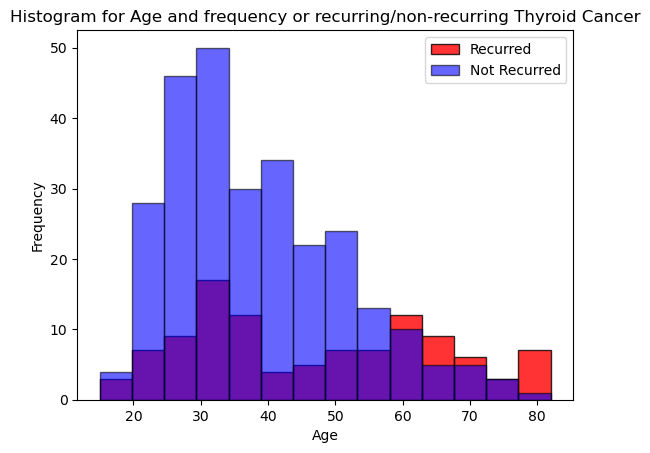

In [21]:
def hist_age_recurrence():
    age_rec_df = df[["Age", "Recurred"]]
    age_recurred = age_rec_df[age_rec_df["Recurred"]=='Yes']['Age']
    age_not_recurred = age_rec_df[age_rec_df["Recurred"]=='No']['Age']
    plt.hist(age_recurred, color = 'Red', bins = 14, alpha = 0.8, label = 'Recurred', edgecolor = 'black', range=(min(df['Age']), max(df['Age'])))
    plt.hist(age_not_recurred, color = 'Blue', bins = 14,alpha = 0.6, label = 'Not Recurred', edgecolor='black', range=(min(df['Age']), max(df['Age'])))
    plt.title("Histogram for Age and frequency or recurring/non-recurring Thyroid Cancer")
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.legend()
    print(f'Mean age for patients with non-recurring cancer: {round(np.mean(age_not_recurred))}')
    print(f'Mean age for patients with recurring cancer: {round(np.mean(age_recurred))}')

hist_age_recurrence()



Insights:
- The distribution for age for patients that have not had a recurrence of cancer looks like a posotively skewed normal distribution. This means the mean will lie more towards the younger ages.
- Distirbution of patients with recurring cancer looks like a combination of two normal distributions.
- The mean age for patients with recurring cancer is larger than mean age of patients with non-recurring cancer, so the older you are the more likely the cancer will reappear.
- Looking at the histogram the age at which there is a larger frequency of recurring patients than non-recurring is $\approx$ 55. This is the age where its more likely the cancer recurrs. As well at this the difference between the the blue and red bars generally becomes smaller as age increases meaning the probability that the cancer with recurr increases with age.


Radiotherapy_hist
No     274
Yes      1
Name: count, dtype: int64
Radiotherapy_hist
No     102
Yes      6
Name: count, dtype: int64


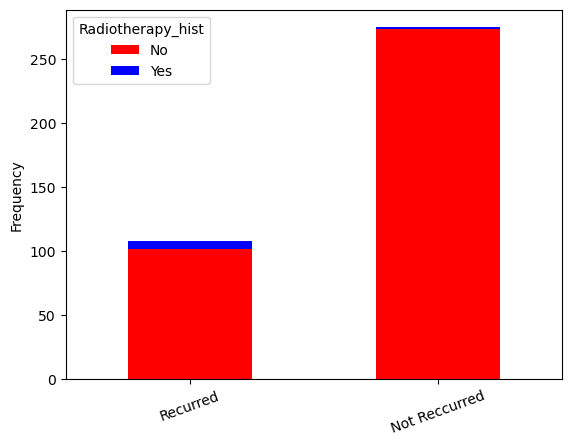

In [22]:
# check effect of Radiotherapy_hist
def radiotherapy_bar():
    radiotherapy_rec = pd.DataFrame(df['Radiotherapy_hist'].loc[df['Recurred'] == 'Yes'].value_counts(sort = False)).rename(columns = {'count':'Recurred'})
    radiotherapy_not_rec = pd.DataFrame(df['Radiotherapy_hist'].loc[df['Recurred'] == 'No'].value_counts(sort = False)).rename(columns = {'count':'Not Reccurred'})
    radiotherapy_cat = pd.concat([radiotherapy_rec, radiotherapy_not_rec], axis=1)
    radiotherapy_cat.T.plot(kind='bar', stacked=True, color = ['Red', 'Blue'], rot=20, ylabel='Frequency')

radiotherapy_bar()
print(df['Radiotherapy_hist'].loc[df['Recurred'] == 'No'].value_counts())
print(df['Radiotherapy_hist'].loc[df['Recurred'] == 'Yes'].value_counts())

Insights:
- There are a very small number of patients that have a radiotherapy history. Graph shows that a larger proportion of patients had radiotheapy in the recurred category, however this can be due to noise as a result of the small number of patients that had radiotherapy.

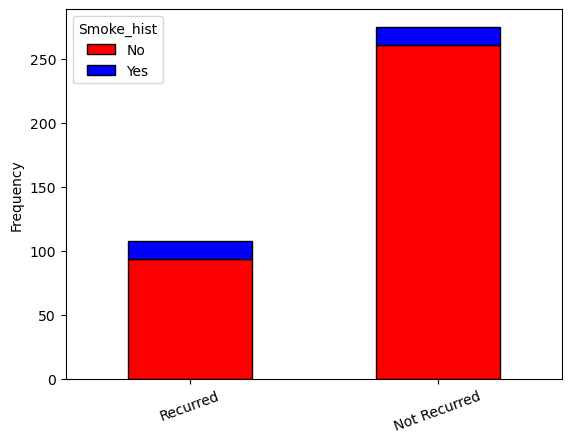

In [23]:
def smokehist_bar():
    radiotherapy_rec = pd.DataFrame(df['Smoke_hist'].loc[df['Recurred'] == 'Yes'].value_counts(sort = False)).rename(columns = {'count':'Recurred'})
    radiotherapy_not_rec = pd.DataFrame(df['Smoke_hist'].loc[df['Recurred'] == 'No'].value_counts(sort = False)).rename(columns = {'count':'Not Recurred'})
    radiotherapy_cat = pd.concat([radiotherapy_rec, radiotherapy_not_rec], axis=1)
    radiotherapy_cat.T.plot(kind='bar', stacked=True, color = ['Red', 'Blue'], rot=20, ylabel='Frequency', edgecolor = 'black')

smokehist_bar()

Insights:
- A posotive smoke history means the cancer is more likely to come back.

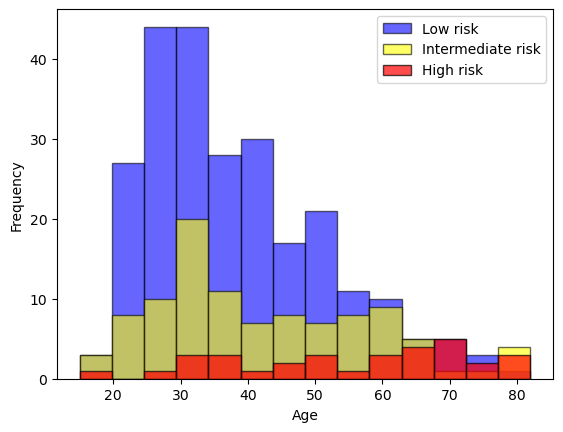

In [24]:
def age_risk_hist():
    age_low_risk = df["Age"].loc[df['Risk'] == 'Low']
    age_inter_risk = df["Age"].loc[df['Risk'] == 'Intermediate']
    age_high_risk = df["Age"].loc[df['Risk'] == 'High']
    plt.hist(age_low_risk, color = 'Blue', bins = 14, alpha = 0.6, label = 'Low risk', edgecolor = 'black', range=(min(df['Age']), max(df['Age'])))
    plt.hist(age_inter_risk, color = 'Yellow', bins = 14,alpha = 0.6, label = 'Intermediate risk', edgecolor='black', range=(min(df['Age']), max(df['Age'])))
    plt.hist(age_high_risk, color = 'Red', bins = 14,alpha = 0.7, label = 'High risk', edgecolor='black', range=(min(df['Age']), max(df['Age'])))
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.legend()

age_risk_hist()

Insights:
- The distibution for low risk starts off very posotively skewed meaning the mean age lies more to the left (lower age). This skewness is lost as the risk goes up meaning the mean age increases as age increases which is expected.

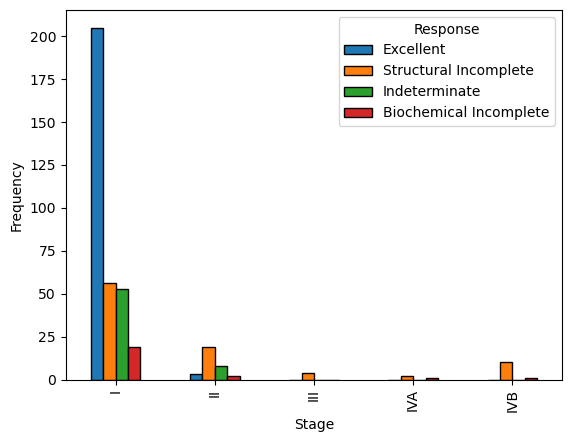

In [25]:
def response_against_stage():
    data_response = []
    unique_stages = ['I', 'II', 'III', 'IVA', 'IVB'] # unique stages in order of severity

    for stage in unique_stages:
        responses = pd.DataFrame(df['Response'].loc[df['Stage'] == stage].value_counts()).rename(columns={"count":stage}).T
        data_response.append(responses)

    cat_response_data = pd.concat(data_response, axis = 0).fillna(0)
    cat_response_data.plot(kind='bar',
                        xlabel = 'Stage',
                        ylabel='Frequency',
                        edgecolor='black')
    
response_against_stage()

Insights:
- A large majority of the excelent responses is in the stage I category. Also a significant decrease in Excellent responses from stage I to II
- After stage II there are no Excellent or Indeterminate responses and therfor the responses are allways incomplete.

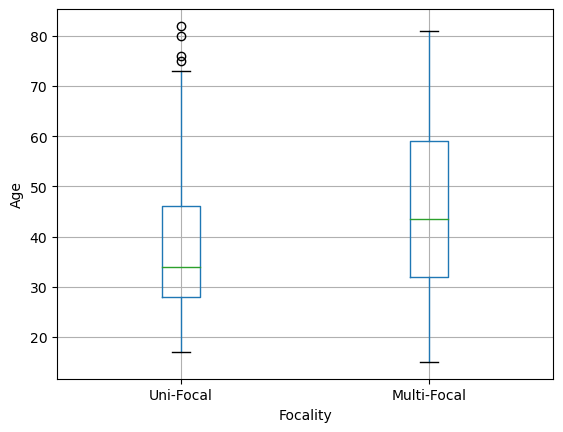

In [26]:
# Box plots for each age group and Focality
def age_focality_box():
    unique_focality = df['Focality'].unique()
    dataframe_focality = []
    for focality in unique_focality:
        dataframe_new = pd.DataFrame(df[['Age']].loc[df['Focality']==focality]).rename(columns={'Age':
                                                                                            focality})
        dataframe_focality.append(dataframe_new)

    df_age_focality = pd.concat(dataframe_focality, axis=1)

    df_age_focality.boxplot(ylabel = 'Age',
                            xlabel = 'Focality')
                            
age_focality_box()

Insights:
- since uni-focal is less severe than multi-focal this plot reinforces the fact that an older patient is at a larger risk. This is because median age for uni-focal is lower than multi-focal.
- The age range of multifocal patients is spread out more.
- Uni-focal is skewed towards lowerer ages.

## Data preprocessing

In [27]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [41]:
onehot_encode = OneHotEncoder()
ordinal_encode = OrdinalEncoder()
print(onehot_encode.fit_transform(np.array(df['Gender'])))

ValueError: Expected 2D array, got 1D array instead:
array=['F' 'F' 'F' 'F' 'F' 'M' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F'
 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'M' 'M' 'F' 'F' 'F' 'F' 'F' 'F' 'M' 'F'
 'F' 'M' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F'
 'F' 'F' 'F' 'F' 'F' 'F' 'M' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'M' 'F' 'F' 'F'
 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'M'
 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'M' 'F' 'F' 'F' 'F' 'F' 'F' 'F'
 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F'
 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F'
 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'M' 'M' 'F' 'F' 'F' 'F'
 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'M' 'F' 'F' 'M' 'F' 'F' 'F' 'F' 'F' 'F' 'M'
 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'M' 'F' 'F'
 'F' 'M' 'F' 'F' 'M' 'M' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'M' 'F' 'F'
 'F' 'F' 'M' 'F' 'F' 'F' 'F' 'F' 'M' 'F' 'F' 'F' 'M' 'M' 'M' 'F' 'F' 'F'
 'F' 'F' 'F' 'M' 'F' 'M' 'M' 'M' 'M' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F'
 'F' 'F' 'M' 'F' 'M' 'F' 'F' 'F' 'M' 'F' 'F' 'F' 'F' 'F' 'F' 'M' 'F' 'F'
 'F' 'F' 'F' 'F' 'M' 'M' 'F' 'M' 'M' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'M'
 'F' 'F' 'F' 'F' 'F' 'F' 'M' 'F' 'F' 'F' 'M' 'F' 'F' 'F' 'M' 'F' 'F' 'F'
 'F' 'F' 'F' 'F' 'M' 'F' 'M' 'F' 'F' 'F' 'M' 'F' 'F' 'M' 'F' 'F' 'M' 'M'
 'M' 'F' 'F' 'F' 'F' 'F' 'M' 'F' 'F' 'M' 'F' 'M' 'M' 'F' 'F' 'F' 'F' 'F'
 'F' 'F' 'F' 'F' 'M' 'M' 'F' 'M' 'F' 'M' 'F' 'F' 'M' 'F' 'M' 'F' 'F' 'F'
 'M' 'F' 'F' 'F' 'F' 'F' 'F' 'M' 'F' 'M' 'M' 'F' 'F' 'M' 'M' 'F' 'M' 'M'
 'M' 'M' 'M' 'M' 'M'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [33]:
df["Gender"]

0      OneHotEncoder()
1      OneHotEncoder()
2      OneHotEncoder()
3      OneHotEncoder()
4      OneHotEncoder()
            ...       
378    OneHotEncoder()
379    OneHotEncoder()
380    OneHotEncoder()
381    OneHotEncoder()
382    OneHotEncoder()
Name: Gender, Length: 383, dtype: object